# Testing Log of negative numbers

In [1]:
a = [1,10,100,-10,-np.e]
x = torch.tensor(a,dtype=complex)
print(torch.log(x))
x = np.array(a,dtype=complex)
np.log(x)

NameError: name 'np' is not defined

# Pipeline

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torchaudio.functional as T
from torch.utils.data import DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torchaudio
import torchaudio.datasets
from IPython.display import Audio
import importlib

#run in case files are deleted
'''
!git init
!git remote add origin https://github.com/ChiragSehga1/TrainingParadigms.git
!git clone https://github.com/ChiragSehga1/TrainingParadigms.git
'''

'\n!git init\n!git remote add origin https://github.com/ChiragSehga1/TrainingParadigms.git\n!git clone https://github.com/ChiragSehga1/TrainingParadigms.git\n'

## Supervised

### Testing DataLoaders

Total Training Batches: 15000
Total Testing Batches: 2500
Batch Size: torch.Size([4, 1, 28, 28])


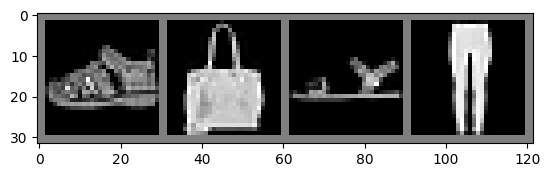

Sandal Bag   Sandal Trouser


In [2]:
from Supervised import dataloader as dl
batchSize = 4
fashionTrain,fashionTest,fashionClasses = dl.Fashion(batchSize=batchSize)
def imshow(img,mean=0.5,variance=0.5):
    img = img*variance + mean     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
dataiter = iter(fashionTrain)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images))
print(' '.join(f'{fashionClasses[labels[j]]:5s}' for j in range(batchSize)))

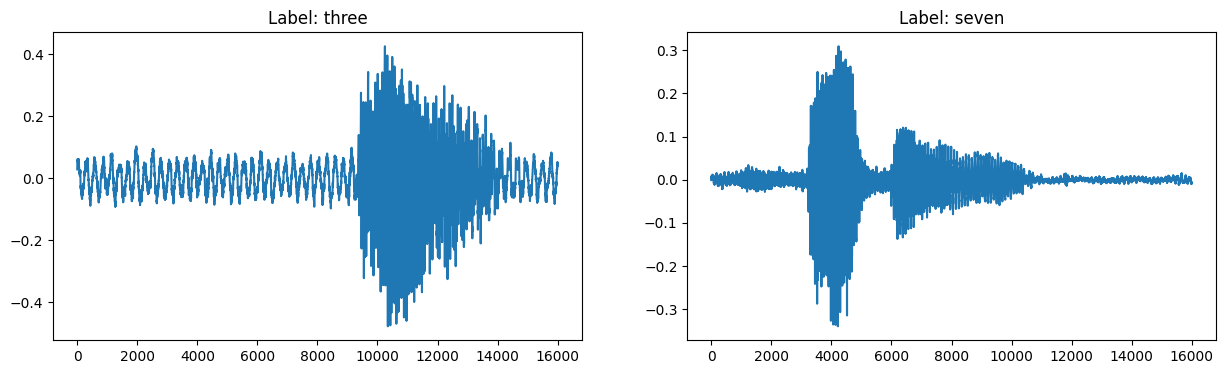

In [3]:
from Supervised import dataloader as dl

batchSize = 2
speechTrain, speechTest, speechClasses = dl.Speech(batchSize)
dataiter = iter(speechTrain)
waveforms, sample_rates, labels, *_ = next(dataiter)

# Create subplots
fig, axes = plt.subplots(1, batchSize, figsize=(15, 4))
if batchSize == 1:
    axes = [axes]
# Plot the waveforms
for i in range(batchSize):
    waveform = waveforms[i].numpy()
    axes[i].plot(waveform[0])  # Plot the first channel
    axes[i].set_title(f"Label: {labels[i]}")
plt.show()

#AUDIO
waveform_np = waveforms[0].numpy()
# If multi-channel, select the first channel
if waveform_np.shape[0] > 1:
    waveform_np = waveform_np[0]
# Normalize the waveform to the range [-1, 1]
waveform_np = waveform_np.astype(np.float32)  
waveform_np /= np.max(np.abs(waveform_np))  # Prevent clipping
# Convert sample rate to an integer
sample_rate = int(sample_rates[0].item())
Audio(waveform_np, rate=sample_rate)

### Testing Models

In [4]:
import torch
import importlib
import Supervised
import Supervised.dataloader
import Supervised.model
import Supervised.lossFunction

# Reload all modules before importing
importlib.reload(Supervised.dataloader)
importlib.reload(Supervised.model)
importlib.reload(Supervised.lossFunction)

# Now import the reloaded modules
from Supervised.dataloader import Fashion, Speech
from Supervised.model import fashionModel1, fashionModel2, speechModel1, speechModel2
from Supervised.lossFunction import TrainableTripleLoss, LearnedLoss


images, labels = next(iter(fashionTrain))
print(f"FashionMNIST batch shape: {images.shape}, Labels: {labels}")

# Instantiate and test fashion models with dummy data
model_f1 = fashionModel1()
model_f2 = fashionModel2()
output_f1 = model_f1(images)
output_f2 = model_f2(images)
print(f"fashionModel1 output shape: {output_f1.shape}")
print(f"fashionModel2 output shape: {output_f2.shape}")

for i, batch in enumerate(speechTrain):
    waveform, sample_rate, label = batch[0], batch[1], batch[4]  # Extract only necessary values
    
    # Ensure waveform has exactly 16000 samples (Pad or Trim)
    waveform = F.pad(waveform, (0, max(0, 16000 - waveform.shape[-1])))  # Pads only if needed
    waveform = waveform[:, :, :16000]  # Trim to 16000 if longer
    break  # Just testing one batch

# Now fetching a batch from speechTrain correctly
batch = next(iter(speechTrain))
waveform, sample_rate, label = batch[0], batch[1], batch[4]

print(f"SpeechCommands waveform shape: {waveform.shape}, Sample Rate: {sample_rate}, Labels: {label}")

# Instantiate and test speech models with dummy data
model_s1 = speechModel1()
model_s2 = speechModel2()

# Ensure the waveform input matches model expectations
output_s1 = model_s1(waveform)  # Check if model expects [batch, 1, 16000]
output_s2 = model_s2(waveform)

print(f"speechModel1 output shape: {output_s1.shape}")
print(f"speechModel2 output shape: {output_s2.shape}")


FashionMNIST batch shape: torch.Size([4, 1, 28, 28]), Labels: tensor([6, 4, 8, 3])
fashionModel1 output shape: torch.Size([4, 10])
fashionModel2 output shape: torch.Size([4, 10])
SpeechCommands waveform shape: torch.Size([2, 1, 16000]), Sample Rate: tensor([16000, 16000]), Labels: tensor([1, 0])
speechModel1 output shape: torch.Size([2, 32])
speechModel2 output shape: torch.Size([2, 32])


### Testing Loss Functions

In [5]:
# Test TrainableTripleLoss with dummy data
loss_fn = TrainableTripleLoss()
anchor, positive, negative = torch.randn(4, 64), torch.randn(4, 64), torch.randn(4, 64)
loss_value = loss_fn(anchor, positive, negative)
print(f"TrainableTripleLoss output: {loss_value}")

# Test LearnedLoss with dummy data
learned_loss_fn = LearnedLoss()
pred, target = torch.randn(4, 1), torch.randn(4, 1)
learned_loss_value = learned_loss_fn(pred, target)
print(f"LearnedLoss output: {learned_loss_value}")

TrainableTripleLoss output: 1.9406955242156982
LearnedLoss output: 0.9676231741905212


## Unsupervised

### Testing out Custom DataLoader

In [6]:
from Unsupervised import dataloader as Udl
#importlib.reload(Udl)  # Force reload if not showing saved changes

rootDir = "./data/SpeechCommands/speech_commands_v0.02"
dataset = Udl.TripletLoader(rootDir,transform = None,triplet = True)

In [7]:
sample = dataset[1600]

print("Anchor shape:", sample['anchor'].shape)
print("Anchor Class:", sample['anchorClass'])
print("Positive shape:", sample['positive'].shape)
print("Positive Class:", sample['positiveClass'])
print("Negative shape:", sample['negative'].shape)
print("Negative Class:", sample['negativeClass'])
print("Sample Rate:", sample['sampleRate'])

Anchor shape: torch.Size([1, 16000])
Anchor Class: up
Positive shape: torch.Size([1, 16000])
Positive Class: up
Negative shape: torch.Size([1, 16000])
Negative Class: bird
Sample Rate: 16000


### Testing ResNet models

In [8]:
from Unsupervised import model as Um
importlib.reload(Um)  # Force reload if not showing saved changes

model = Um.ResNet18(10,1)

import torch

batch_size = 5
numClasses = 10
in_channels = 1  # Change if your input has more channels
seq_length = 16000  # Example: 1 second of audio sampled at 16kHz

# Create random input tensor
x = torch.randn(batch_size, in_channels, seq_length)

resnet18 = Um.ResNet18(numClasses, inChannels=in_channels)
resnet50 = Um.ResNet50(numClasses, inChannels=in_channels)
resnet101 = Um.ResNet101(numClasses, inChannels=in_channels)

In [9]:
output18 = resnet18(x)
print("ResNet18 Output Shape: ", output18.shape)

output34 = resnet18(x)
print("ResNet34 Output Shape: ", output34.shape)

output50 = resnet50(x)
print("ResNet50 Output Shape: ", output50.shape)

output101 = resnet101(x)
print("ResNet101 Output Shape:", output101.shape)

ResNet18 Output Shape:  torch.Size([5, 10])
ResNet34 Output Shape:  torch.Size([5, 10])
ResNet50 Output Shape:  torch.Size([5, 10])
ResNet101 Output Shape: torch.Size([5, 10])


### Testing Clustering Loss and Triplet Loss

In [10]:
from Unsupervised import lossFunction as Ulf
importlib.reload(Ulf)  # Force reload if not showing saved changes

clusteringLoss = Ulf.TrainableClusteringLoss(numClusters=10, embeddingDim=512)
embeddings = torch.randn(4, 512)  # Fake embeddings (batch_size=4, feature_dim=512)
loss, assignments = clusteringLoss(embeddings)
print("Clustering Loss:", loss.item())
print("Cluster Assignments:", assignments)

Clustering Loss: 1.820033073425293
Cluster Assignments: tensor([1, 9, 4, 7])


In [11]:
tripletLossFn = Ulf.TripletLoss(margin=0.2)
anchor = torch.randn(4, 512)
positive = torch.randn(4, 512)
negative = torch.randn(4, 512)

tripletLoss = tripletLossFn(anchor, positive, negative)
print("Triplet Loss:", tripletLoss.item())

Triplet Loss: 0.45534735918045044


### Understanding Cosine Annealing

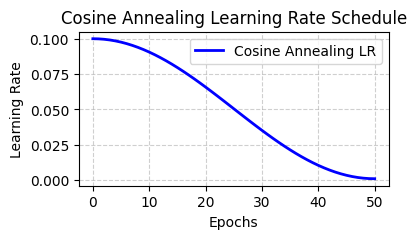

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T_max = 50  # Total epochs for full decay
eta_max = 0.1  # Initial learning rate
eta_min = 0.001  # Minimum learning rate

# Generate epochs
epochs = np.arange(0, T_max + 1)
# Compute learning rate for each epoch using cosine annealing formula
lr_values = eta_min + 0.5 * (eta_max - eta_min) * (1 + np.cos(np.pi * epochs / T_max))

# Plot the learning rate schedule
plt.figure(figsize=(4, 2))
plt.plot(epochs, lr_values, label="Cosine Annealing LR", color='b', linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Cosine Annealing Learning Rate Schedule")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

### Running the Model
Considering the size of the data set, even the 1st epoch takes very long

In [ ]:
!python Unsupervised/main.py